<a href="https://colab.research.google.com/github/faznafathima/__PROJECTS__/blob/main/electric_production_time_series_forecasting_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIME SERIES FORECASTING ___ LSTM**

IMPORTING NECESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

LOADING AND READING DATA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Electric_Production.csv",index_col='DATE', parse_dates=True)
df

IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
...                ...
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048

[397 rows x 1 columns]

In [5]:
df.columns = ["Production"]

In [6]:
df.head()

Production
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151

In [7]:
df.tail()

Production
DATE                  
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048

In [8]:
df.isnull().sum()

Production    0
dtype: int64

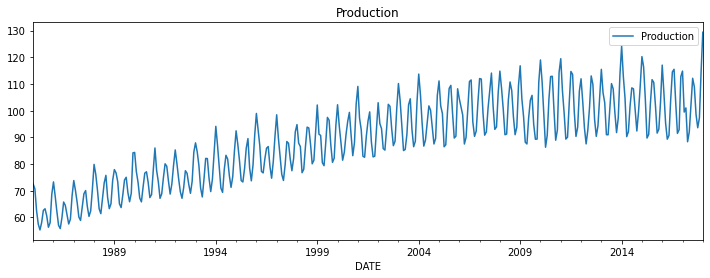

In [9]:
df.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Production')
plt.show(block=False)

TIME SERIES DECOMPOSITION

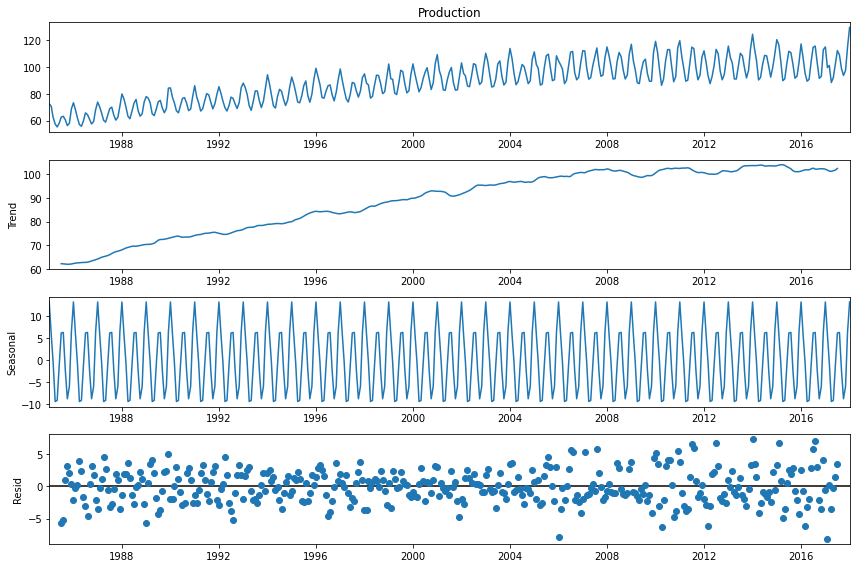

In [10]:
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df.Production)
fig = decomposition.plot()
plt.show()

**Looking at the above plot we can see the trend in the Time Series.**

DATA PREPARATION

In [11]:
train_len = 360
train=df[0:train_len]
test=df[train_len:] 
print("Training set: ", train.shape)
print("Testing set: ", test.shape)

Training set:  (360, 1)
Testing set:  (37, 1)


In [12]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [13]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [14]:
n_months = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_months, batch_size=1)

APPLYING Model-LSTM

In [15]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', input_shape=(n_months, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(generator, epochs=10)

Epoch 1/10
348/348 [==============================] - 5s 7ms/step - loss: 0.0225
Epoch 2/10
348/348 [==============================] - 2s 6ms/step - loss: 0.0136
Epoch 3/10
348/348 [==============================] - 2s 6ms/step - loss: 0.0097
Epoch 4/10
348/348 [==============================] - 2s 6ms/step - loss: 0.0049
Epoch 5/10
348/348 [==============================] - 3s 8ms/step - loss: 0.0028
Epoch 6/10
348/348 [==============================] - 3s 9ms/step - loss: 0.0031
Epoch 7/10
348/348 [==============================] - 2s 7ms/step - loss: 0.0024
Epoch 8/10
348/348 [==============================] - 2s 7ms/step - loss: 0.0024
Epoch 9/10
348/348 [==============================] - 2s 7ms/step - loss: 0.0024
Epoch 10/10
348/348 [==============================] - 2s 7ms/step - loss: 0.0026


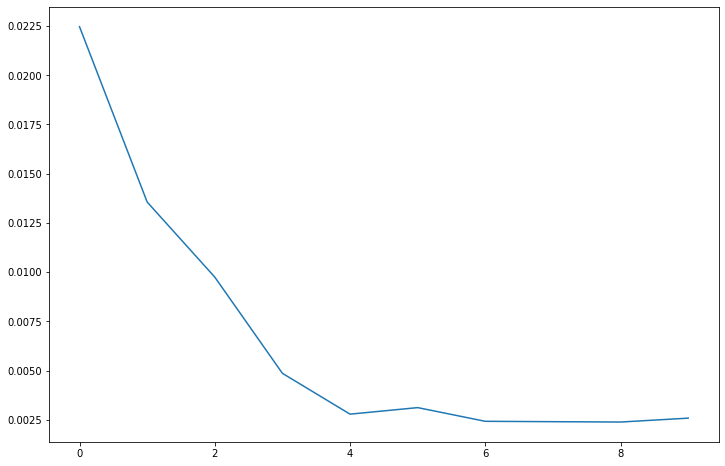

In [17]:
plt.plot(history.history['loss'])
plt.show()

MODEL EVALUATION

In [18]:
temp = scaled_train[-n_months:]
temp = temp.reshape((1, n_months, 1))
model.predict(temp)

1/1 [==============================] - 0s 217ms/step


array([[0.8716811]], dtype=float32)

In [19]:
test_predictions = []
last_batch = scaled_train[-n_months:]
current_batch = last_batch.reshape((1, n_months, 1))
for i in range((test.shape[0])):
    pred = model.predict(current_batch)[0]
    test_predictions.append(pred)
    current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis=1)

1/1 [==============================] - 0s 26ms/step


In [20]:
test['LSTM_Predictions'] = scaler.inverse_transform(test_predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


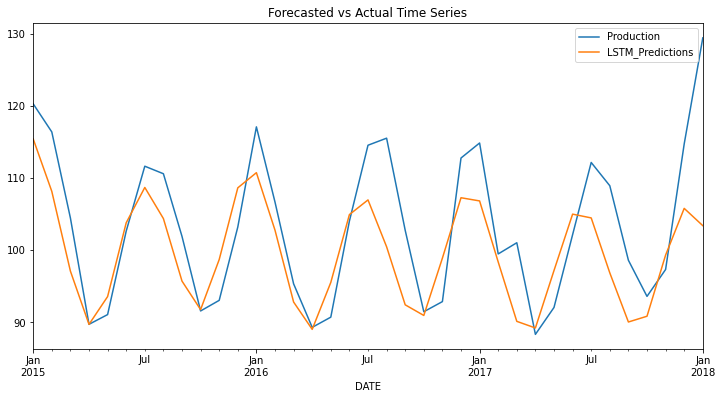

In [21]:
test.plot(figsize=(12,6))
plt.title("Forecasted vs Actual Time Series")
plt.show()

In [22]:
test.head(10)

Production  LSTM_Predictions
DATE                                    
2015-01-01    120.2696        115.408620
2015-02-01    116.3788        108.151354
2015-03-01    104.4706         97.114402
2015-04-01     89.7461         89.736196
2015-05-01     91.0930         93.585976
2015-06-01    102.6495        103.800091
2015-07-01    111.6354        108.694791
2015-08-01    110.5925        104.386871
2015-09-01    101.9204         95.729916
2015-10-01     91.5959         91.778698



---



---

